# Pneumonia Detection Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os

In [2]:
Train_path = "//kaggle/input/pneumonia-dataset/ChestXRays Pneumonia Dataset/ChestXRays Pneumonia Dataset/train"
Val_path = "/kaggle/input/pneumonia-dataset/ChestXRays Pneumonia Dataset/ChestXRays Pneumonia Dataset/test"

In [3]:
 model = Sequential()
    
# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
    
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
    
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
    
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
    
model.add(Flatten())
    
    # Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Binary classification
    


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model from Scratch

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
import keras
print(keras.__version__)


3.0.5


In [10]:
train_datagen = ImageDataGenerator(
     rescale = 1./255,
     shear_range = 0.2,
     zoom_range = 0.2,
     horizontal_flip = True,
 )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
      '/kaggle/input/pneumonia-dataset/ChestXRays Pneumonia Dataset/ChestXRays Pneumonia Dataset/train',
       target_size = (224,224),
       batch_size = 32,
       class_mode = 'binary')

Found 7653 images belonging to 2 classes.


In [12]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [13]:
validation_generator = test_datagen.flow_from_directory(
     '/kaggle/input/pneumonia-dataset/ChestXRays Pneumonia Dataset/ChestXRays Pneumonia Dataset/test',
      target_size = (224,224),
      batch_size = 32,
      class_mode = 'binary')

Found 789 images belonging to 2 classes.


In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = len(validation_generator)
    )

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/240 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.4922 - loss: 0.8111   

I0000 00:00:1710638058.855122     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710638058.875189     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


206/240 ━━━━━━━━━━━━━━━━━━━━ 26s 787ms/step - accuracy: 0.7638 - loss: 0.4571

W0000 00:00:1710638220.163420     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.7771 - loss: 0.4378

W0000 00:00:1710638245.580767     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


240/240 ━━━━━━━━━━━━━━━━━━━━ 234s 894ms/step - accuracy: 0.7775 - loss: 0.4373 - val_accuracy: 0.6223 - val_loss: 0.8820
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20


W0000 00:00:1710638272.526749     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


240/240 ━━━━━━━━━━━━━━━━━━━━ 176s 714ms/step - accuracy: 0.9193 - loss: 0.1957 - val_accuracy: 0.8378 - val_loss: 0.4428
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 175s 711ms/step - accuracy: 0.9403 - loss: 0.1518 - val_accuracy: 0.8682 - val_loss: 0.3078
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 172s 701ms/step - accuracy: 0.9473 - loss: 0.1364 - val_accuracy: 0.8619 - val_loss: 0.4436
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 175s 711ms/step - accuracy: 0.9549 - loss: 0.1230 - val_accuracy: 0.8365 - val_loss: 0.4889
Epoch 10/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 59us

Checking Loss

In [15]:
model.save("pneumonia_model_adv.h5")

In [16]:
model.evaluate(train_generator)

240/240 ━━━━━━━━━━━━━━━━━━━━ 152s 635ms/step - accuracy: 0.9744 - loss: 0.0752


W0000 00:00:1710640138.363768     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.07384569942951202, 0.9742584824562073]

In [17]:
model.evaluate(validation_generator)

25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 795ms/step - accuracy: 0.9214 - loss: 0.2534


[0.2392110824584961, 0.9214195013046265]

# Test Images

In [5]:
model = load_model('pneumonia_model_adv (1).h5')

In [7]:
train_generator.class_indices

In [8]:
y_actual = []
y_test = []

In [9]:
for i in os.listdir("C:/Users/Ahmad Afzal/Desktop/project setup/Lungs Diseases/Imbalanced Tuberculosis and Pneumonia dataset/universal_test/Pneumonia"):
    img = image.load_img("C:/Users/Ahmad Afzal/Desktop/project setup/Lungs Diseases/Imbalanced Tuberculosis and Pneumonia dataset/universal_test/Pneumonia/" + i, target_size=(224,224))
    img - image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    y_test.append(p[0,0])
    y_actual.append(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

In [11]:
for i in os.listdir("C:/Users/Ahmad Afzal/Desktop/project setup/Lungs Diseases/Imbalanced Tuberculosis and Pneumonia dataset/universal_test/Normal"):
    img = image.load_img("C:/Users/Ahmad Afzal/Desktop/project setup/Lungs Diseases/Imbalanced Tuberculosis and Pneumonia dataset/universal_test/Normal/" +i, target_size=(224,224))
    img - image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    y_test.append(p[0,0])
    y_actual.append(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [12]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [13]:
threshold = 0.5

In [14]:
y_test = (y_test > threshold).astype(int)

In [17]:
y_actual = np.concatenate((np.ones(len(os.listdir("C:/Users/Ahmad Afzal/Desktop/project setup/Lungs Diseases/Imbalanced Tuberculosis and Pneumonia dataset/universal_test/Pneumonia"))), np.zeros(len(os.listdir("C:/Users/Ahmad Afzal/Desktop/project setup/Lungs Diseases/Imbalanced Tuberculosis and Pneumonia dataset/universal_test/Normal")))))

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_actual, y_test)

In [20]:
import seaborn as sns

<Axes: >

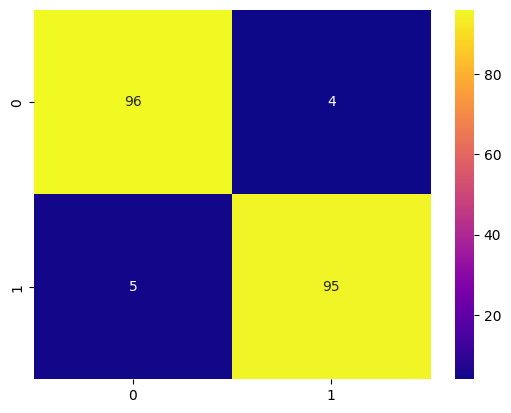

In [21]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [22]:
from sklearn.metrics import accuracy_score, f1_score

In [23]:
final_accuracy = accuracy_score(y_actual, y_test)
print("Accuracy: {:.2f}%".format(final_accuracy * 100))

Accuracy: 95.50%


In [24]:
f1 = f1_score(y_actual, y_test)
print("F1 Score: {:.2f}".format(f1))


F1 Score: 0.95
